# Intensive lectures at Niigata U. 
## (6-7th July 2023)


# Hands-on 4: Renyi entropy of Bell state 

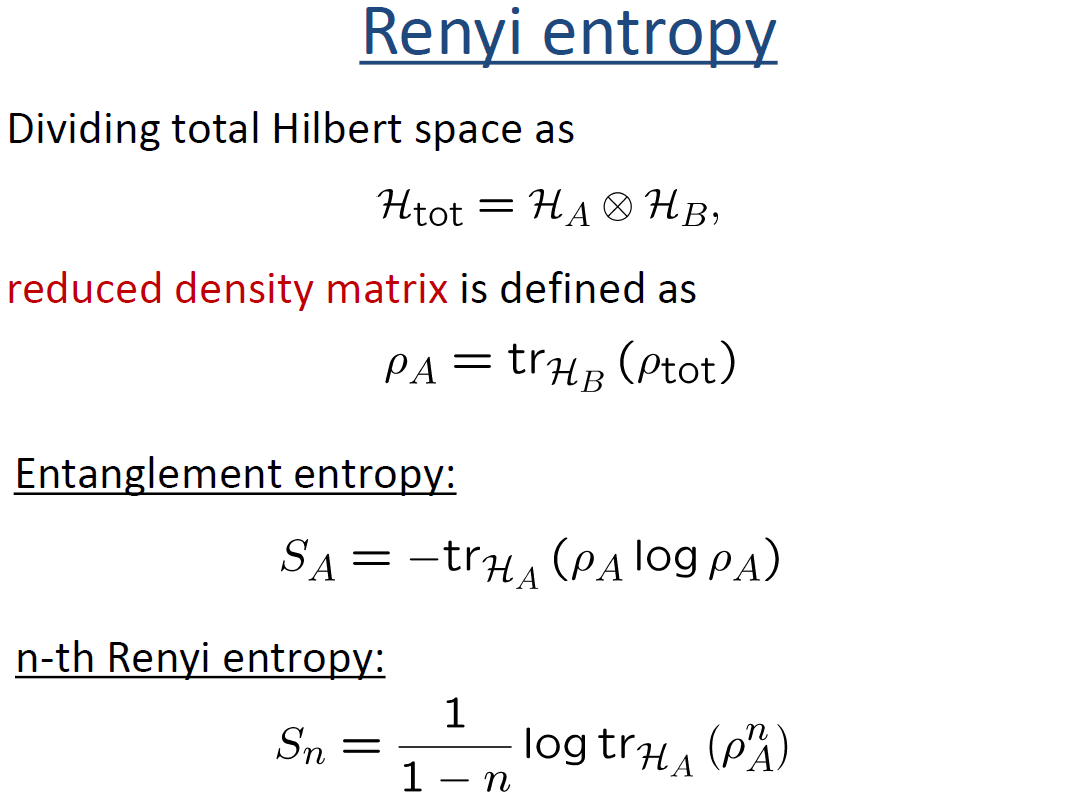

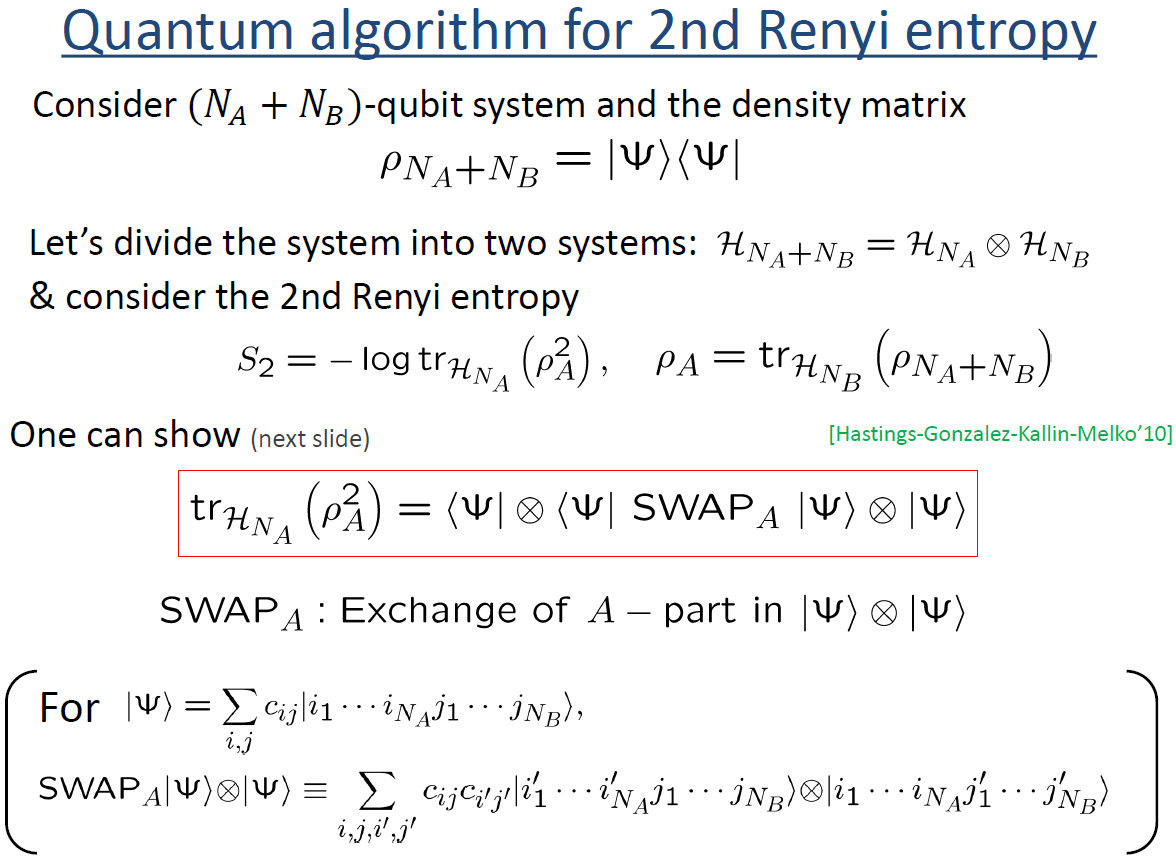

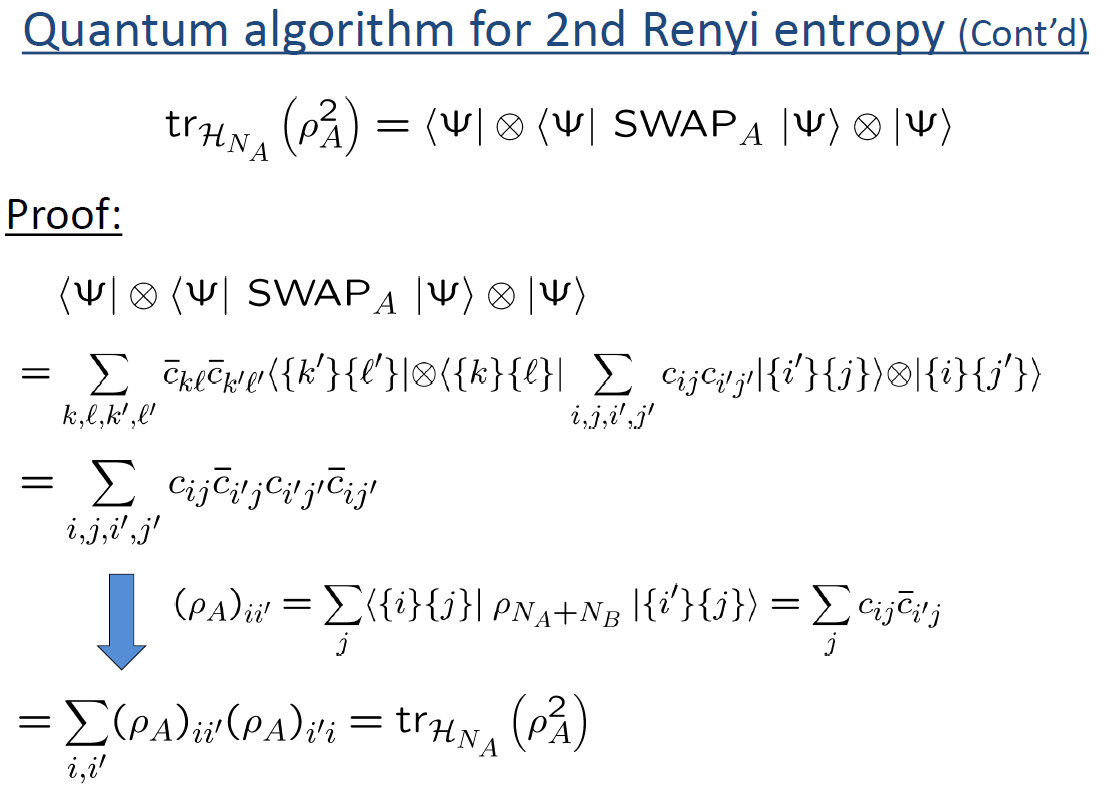

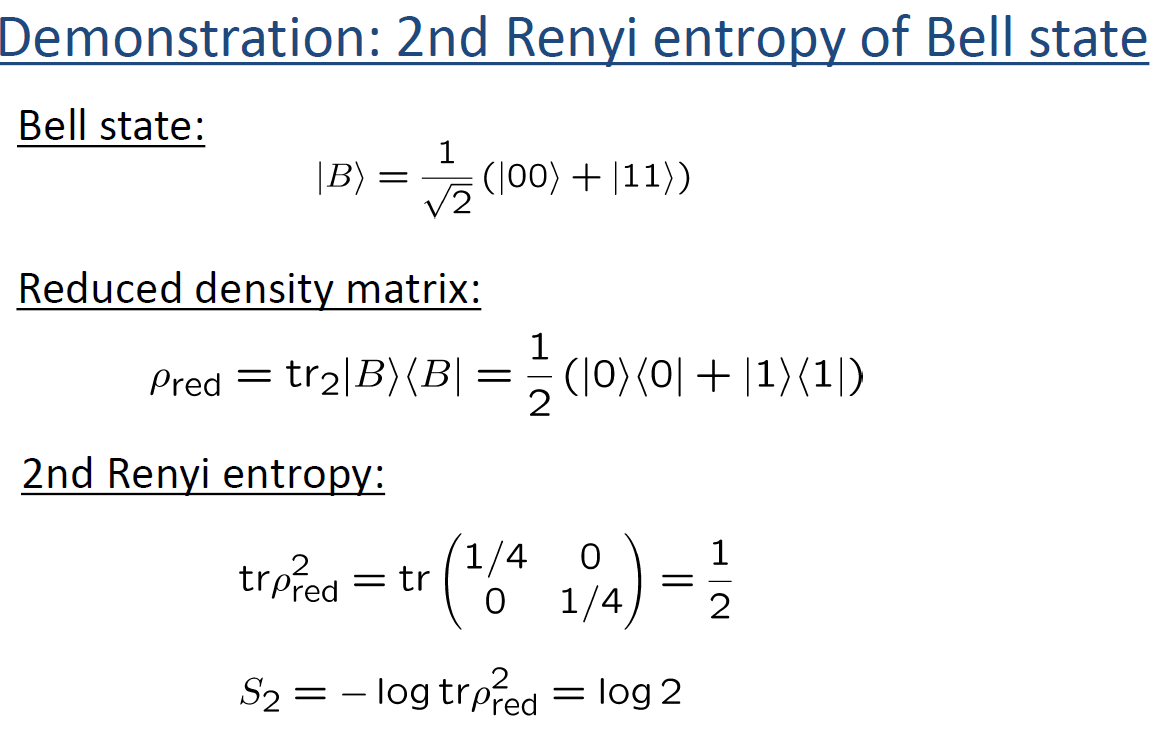

### Import packages

In [1]:
import numpy as np
from qiskit import *
import math

### Code for SWAP

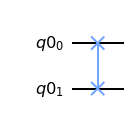

In [2]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.swap(q[0],q[1])
qc.draw(output='mpl')

### Note that direction doesn't matter

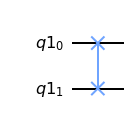

In [3]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.swap(q[1],q[0])
qc.draw(output='mpl')

## Equivalent operations

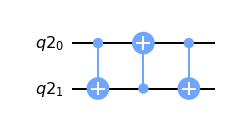

In [4]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])
qc.draw(output='mpl')

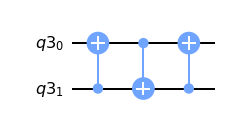

In [5]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.cx(q[1],q[0])
qc.cx(q[0],q[1])
qc.cx(q[1],q[0])
qc.draw(output='mpl')

## Excercise 1: Check the properties of SWAP
$$ {\rm SWAP}|00\rangle =|00\rangle ,\quad
{\rm SWAP}|01\rangle =|10\rangle ,\quad
{\rm SWAP}|10\rangle =|01\rangle ,\quad
{\rm SWAP}|11\rangle =|11\rangle $$
## by 1000 shots

## Answer

{'00': 1000}


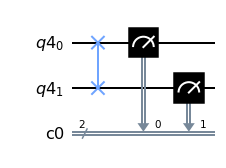

In [6]:
#Check SWAP|00> =|00>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

qc.swap(q[0],q[1])
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'01': 1000}


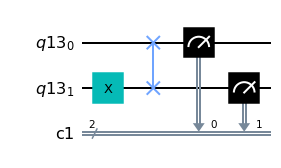

In [7]:
#Check SWAP|01> =|10>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

qc.x(q[1])
qc.swap(q[0],q[1])
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'10': 1000}


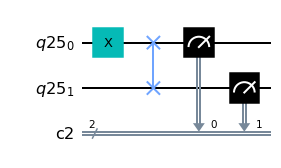

In [8]:
#Check SWAP|10> =|01>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.swap(q[0],q[1])
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'11': 1000}


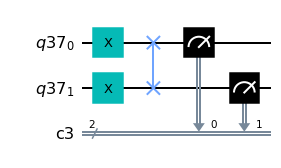

In [9]:
#Check SWAP|11> =|11>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

qc.x(q[0])
qc.x(q[1])
qc.swap(q[0],q[1])
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

## Excercise 2: Instead of ${\rm tr}\rho_{\rm red}^2$, let us consider
$$ P\equiv \left| {\rm tr}\rho_{\rm red}^2 \right|^2
=\left| \langle B|\otimes \langle B|\ {\rm SWAP}^{(1,3)}\ |B\rangle \otimes |B\rangle \right|^2$$
## Confirm $P=\frac{1}{4}$ by 1000 shots of measurement
### (Recall $|B\rangle =CX H^{(1)} |00\rangle$)

## Answer

0.257


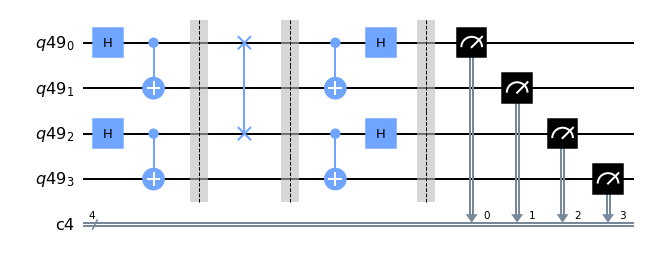

In [10]:
shot_times=1000
N=4
q = QuantumRegister(N)
c = ClassicalRegister(N)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B>|B>
qc.h(q[0])
qc.cx(q[0],q[1])
qc.h(q[2])
qc.cx(q[2],q[3])

qc.barrier(q)

#SWAP
qc.swap(q[0],q[2])

qc.barrier(q)

#inverse procedure of getting |B>|B>
qc.cx(q[0],q[1])
qc.h(q[0])
qc.cx(q[2],q[3])
qc.h(q[2])

qc.barrier(q)

## Measurement
qc.measure(q[0:N],c[0:N]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

print(counts['0000']/shot_times)
qc.draw(output='mpl')

## Excercise 3: Confirm
$$ \left| \langle B|\otimes \langle B|\otimes \langle B|\ 
{\rm SWAP}^{(1,3)} {\rm SWAP}^{(3,5)}  \ 
|B\rangle \otimes |B\rangle \otimes |B\rangle \right|^2 
=\frac{1}{16} = \left| {\rm tr}\rho_{\rm red}^3 \right|^2 $$
## by 1000 shots

## Answer

0.064
0.0625


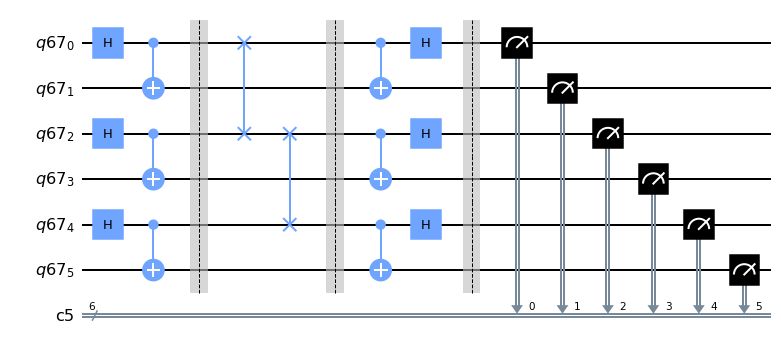

In [11]:
shot_times=1000
N=6
q = QuantumRegister(N)
c = ClassicalRegister(N)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B>|B>|B>
qc.h(q[0])
qc.cx(q[0],q[1])
qc.h(q[2])
qc.cx(q[2],q[3])
qc.h(q[4])
qc.cx(q[4],q[5])
qc.barrier(q)

#SWAP
qc.swap(q[0],q[2])
qc.swap(q[2],q[4])
qc.barrier(q)

#inverse procedure of getting |B>|B>|B>
qc.cx(q[0],q[1])
qc.h(q[0])
qc.cx(q[2],q[3])
qc.h(q[2])
qc.cx(q[4],q[5])
qc.h(q[4])

qc.barrier(q)

## Measurement
qc.measure(q[0:N],c[0:N]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

print(counts['000000']/shot_times)
print(1/16)
qc.draw(output='mpl')

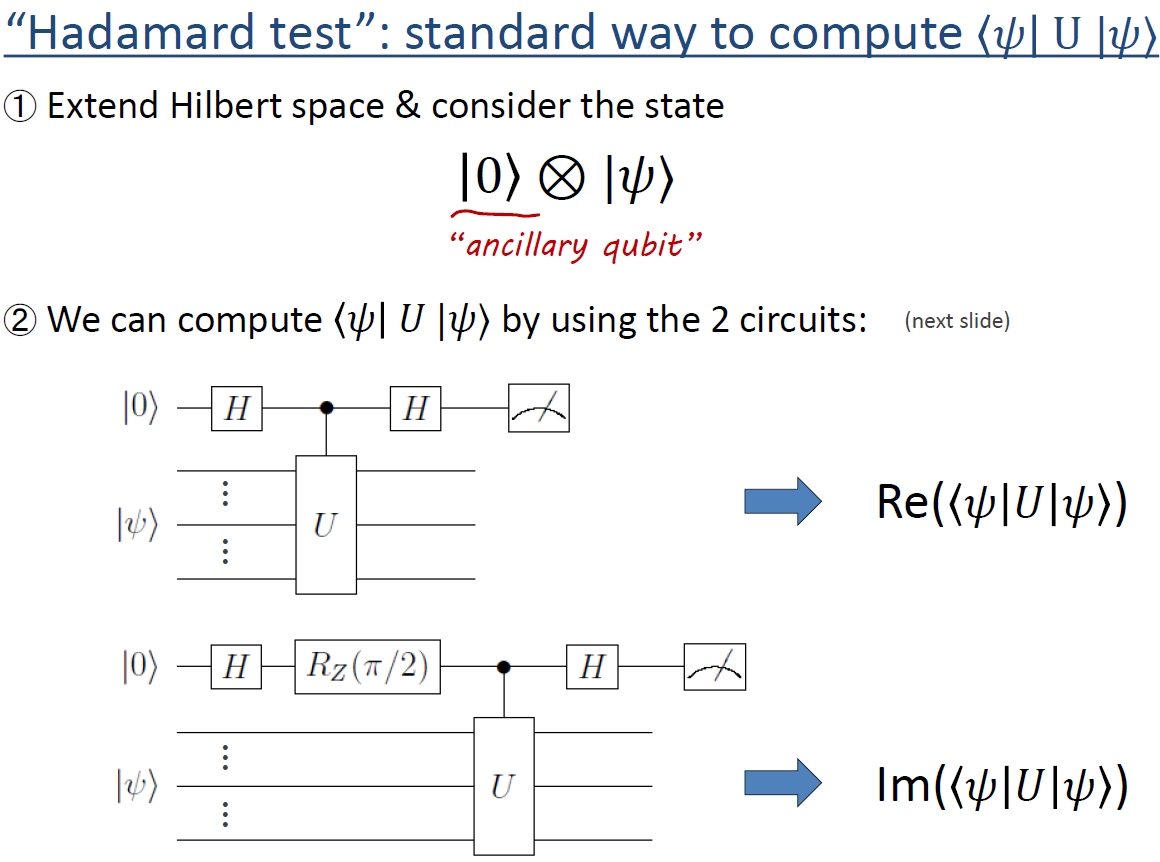

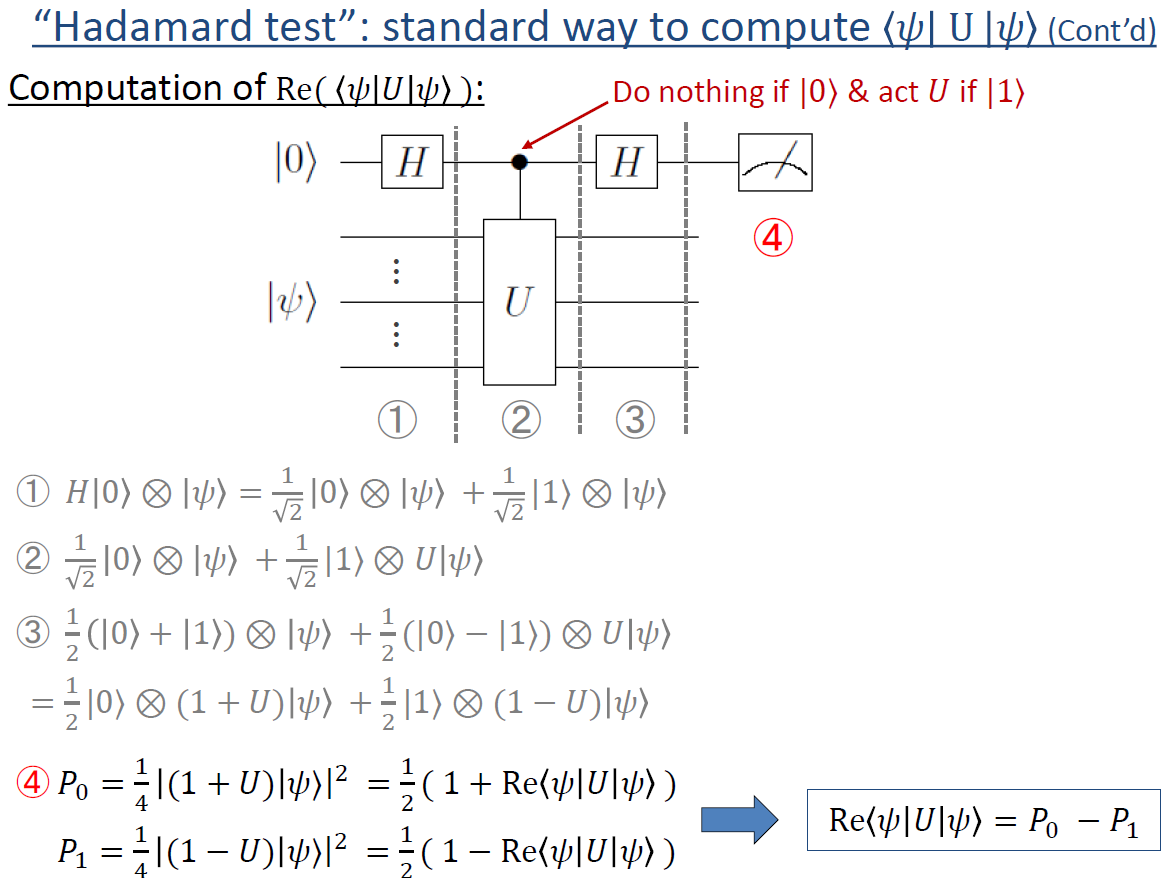

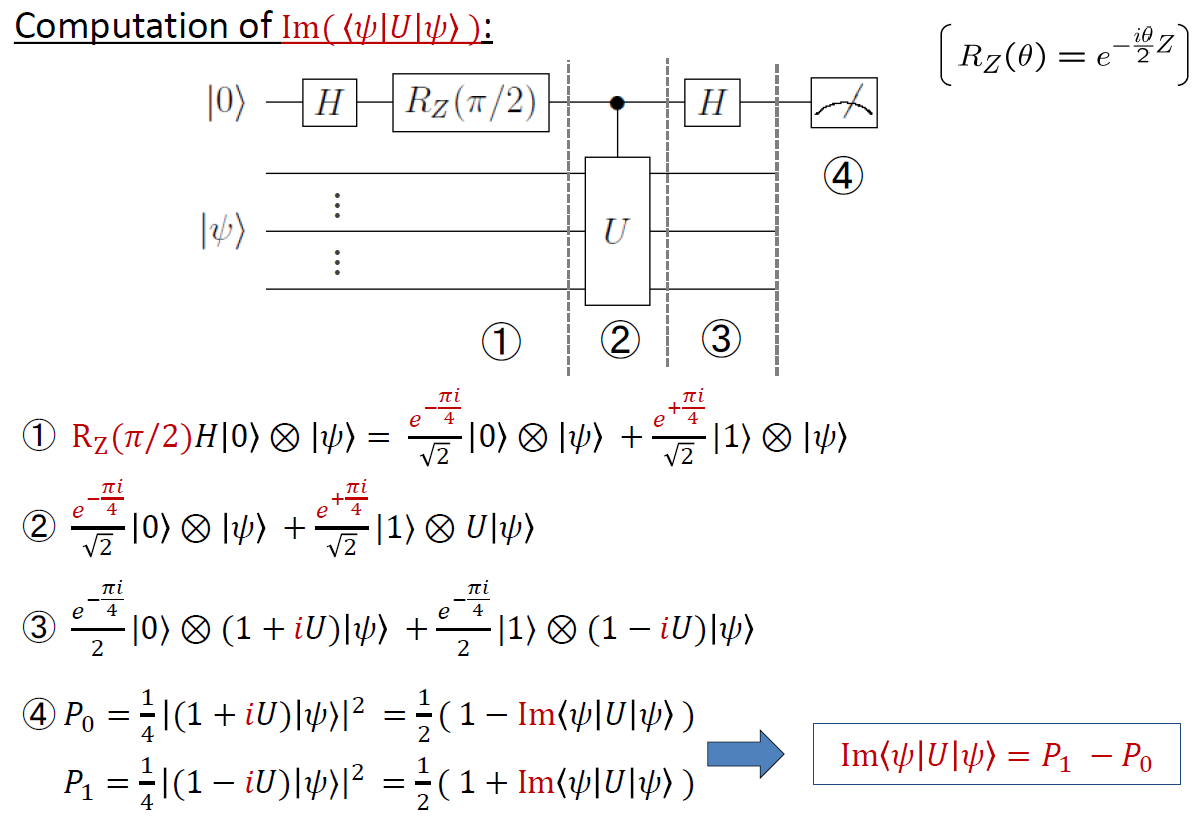

## We would like to directly compute 
$$ {\rm tr}\rho_{\rm red}^2 
= \langle B|\otimes \langle B|\ {\rm SWAP}^{(1,3)}\ |B\rangle \otimes |B\rangle $$
## using Hadamard test. 
## But it seems to require "controlled- SWAP" which is not available in qiskit library. 
## So we need to construct it by ourselves.

## To do this, first note the identity
$$ {\rm SWAP}^{(1,2)} 
=CX^{(1,2)} CX^{(2,1)} CX^{(1,2)}  
=CX^{(2,1)} CX^{(1,2)} CX^{(2,1)}  $$

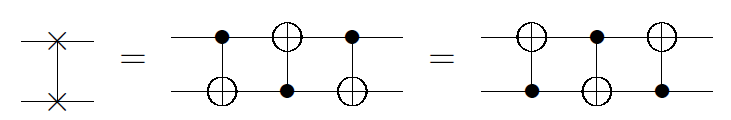

## Therefore, we have

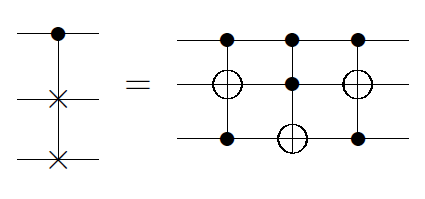

## But we can simplify it as

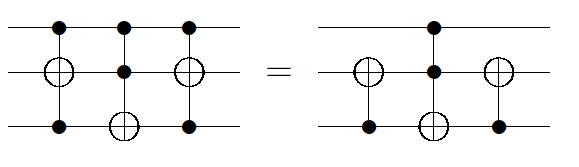

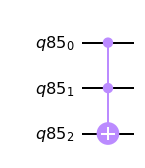

In [12]:
q = QuantumRegister(3)
qc = QuantumCircuit(q) 
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

## Excercise 4: Compute the real and imaginary part of
$$ {\rm tr}\rho_{\rm red}^2 
= \langle B|\otimes \langle B|\ {\rm SWAP}^{(1,3)}\ |B\rangle \otimes |B\rangle $$
## using Hadamard test by 1000 shots.

## Answer

0.558


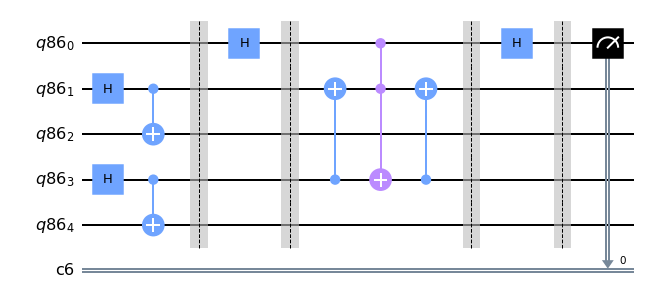

In [13]:
# For real part
shot_times=1000
N=5
q = QuantumRegister(N)
c = ClassicalRegister(1)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B>|B> (regard 0th as ancillary )
qc.h(q[1])
qc.cx(q[1],q[2])
qc.h(q[3])
qc.cx(q[3],q[4])

qc.barrier(q)

# Hadamard test
qc.h(q[0])
qc.barrier(q)
qc.cx(q[3],q[1])
qc.ccx(q[0],q[1],q[3])
qc.cx(q[3],q[1])
qc.barrier(q)
qc.h(q[0])
qc.barrier(q)

## Measurement
qc.measure(q[0],c[0]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

#print(counts)
print( (counts['0']-counts['1'])/shot_times)

qc.draw(output='mpl')

-0.004


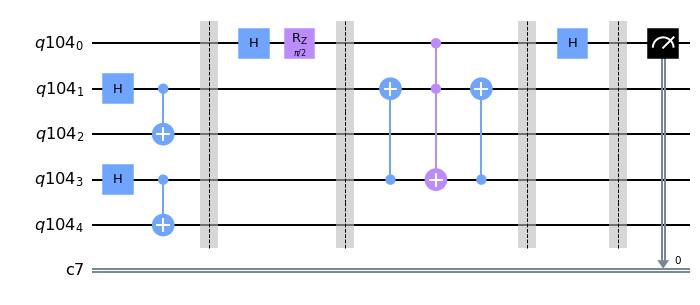

In [14]:
# For imaginary part
shot_times=1000
N=5
q = QuantumRegister(N)
c = ClassicalRegister(1)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B>|B> (regard 0th as ancillary )
qc.h(q[1])
qc.cx(q[1],q[2])
qc.h(q[3])
qc.cx(q[3],q[4])

qc.barrier(q)

# Hadamard test
qc.h(q[0])
qc.rz(math.pi/2,q[0])
qc.barrier(q)
qc.cx(q[3],q[1])
qc.ccx(q[0],q[1],q[3])
qc.cx(q[3],q[1])
qc.barrier(q)
qc.h(q[0])
qc.barrier(q)

## Measurement
qc.measure(q[0],c[0]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

#print(counts)
print( (counts['1']-counts['0'])/shot_times)

qc.draw(output='mpl')

## Excercise 5: let us define
$$ |B'\rangle \equiv \frac{1}{\sqrt{2}}(|01\rangle -|10\rangle ) $$
## Compute the real and imaginary part of
$$ {\rm tr}\rho_{\rm red}^3 
= \langle B'|\otimes \langle B'| \otimes \langle B'| \ {\rm SWAP}^{(1,3)} {\rm SWAP}^{(3,5)} \ |B'\rangle \otimes|B'\rangle \otimes |B'\rangle $$
## using Hadamard test by 1000 shots.

## Answer

0.246


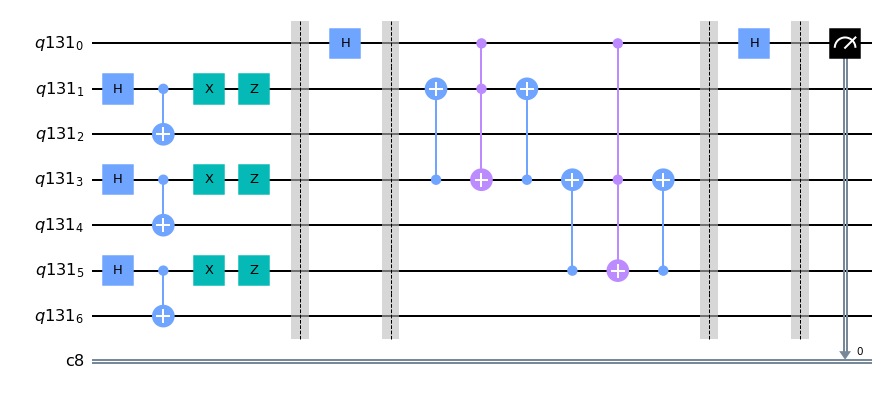

In [15]:
# For real part
shot_times=1000
N=7
q = QuantumRegister(N)
c = ClassicalRegister(1)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B'>|B'>|B'>  (regard 0th as ancillary )
qc.h(q[1])
qc.cx(q[1],q[2])
qc.x(q[1])
qc.z(q[1])
qc.h(q[3])
qc.cx(q[3],q[4])
qc.x(q[3])
qc.z(q[3])
qc.h(q[5])
qc.cx(q[5],q[6])
qc.x(q[5])
qc.z(q[5])

qc.barrier(q)

# Hadamard test
qc.h(q[0])
qc.barrier(q)
qc.cx(q[3],q[1])
qc.ccx(q[0],q[1],q[3])
qc.cx(q[3],q[1])
qc.cx(q[5],q[3])
qc.ccx(q[0],q[3],q[5])
qc.cx(q[5],q[3])
qc.barrier(q)
qc.h(q[0])
qc.barrier(q)

## Measurement
qc.measure(q[0],c[0]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

#print(counts)
print( (counts['0']-counts['1'])/shot_times)

qc.draw(output='mpl')

-0.004


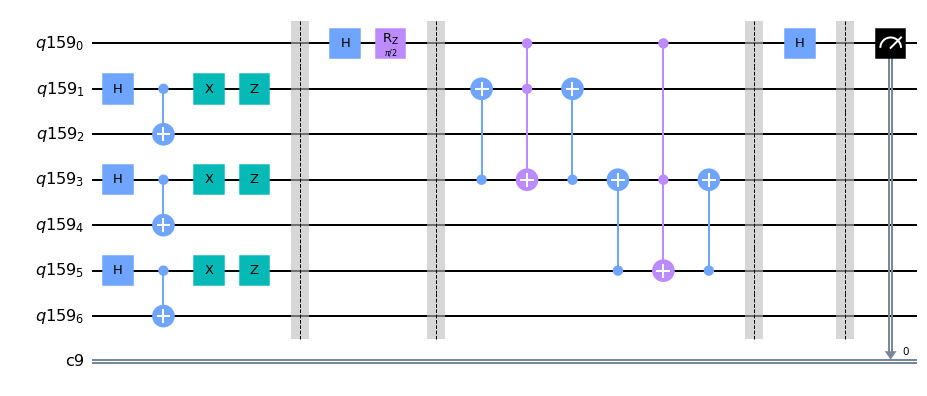

In [16]:
# For imaginary part
shot_times=1000
N=7
q = QuantumRegister(N)
c = ClassicalRegister(1)
simulator = Aer.get_backend('qasm_simulator')
# circuit for time evolution
qc = QuantumCircuit(q,c)

#Get |B'>|B'> |B'> (regard 0th as ancillary )
qc.h(q[1])
qc.cx(q[1],q[2])
qc.x(q[1])
qc.z(q[1])
qc.h(q[3])
qc.cx(q[3],q[4])
qc.x(q[3])
qc.z(q[3])
qc.h(q[5])
qc.cx(q[5],q[6])
qc.x(q[5])
qc.z(q[5])

qc.barrier(q)

# Hadamard test
qc.h(q[0])
qc.rz(math.pi/2,q[0])
qc.barrier(q)
qc.cx(q[3],q[1])
qc.ccx(q[0],q[1],q[3])
qc.cx(q[3],q[1])
qc.cx(q[5],q[3])
qc.ccx(q[0],q[3],q[5])
qc.cx(q[5],q[3])
qc.barrier(q)
qc.h(q[0])
qc.barrier(q)

## Measurement
qc.measure(q[0],c[0]) 
job = execute(qc, simulator, shots=shot_times)
result = job.result()
counts = result.get_counts(qc)

#print(counts)
print( (counts['0']-counts['1'])/shot_times)

qc.draw(output='mpl')